# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**

Due Date : 10/14 (October 14th), 11:59 PM EST

## The Dataset

### Acknowledgements

Big Thanks to https://www.superdatascience.com/pages/deep-learning

Banner Photo by Sharon McCutcheon on Unsplash

### Description

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV

In [14]:
from sklearn.calibration import CalibrationDisplay

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [37]:
## YOUR CODE HERE
#df = pd.read_csv('/COMS 4995/HW2/HW2_dataset.csv') #df
#df.head() # 10000 rows × 14 columns

In [13]:
from google.colab import files
uploaded = files.upload()

Saving HW2_dataset.csv to HW2_dataset.csv


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# import io
df = pd.read_csv('HW2_dataset.csv')

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping)**

I drop columns with missing values because I don't want to input missing values into dicision tree models. The trees classify the label based on the value of variables. If the value is missing, the tree cannot classify and predict. 

In [17]:
## YOUR CODE HERE
df_na = pd.DataFrame(df.isnull().sum()) # series
df_na

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,441
Geography,0
Gender,0
Age,0
Tenure,0
Balance,123
NumOfProducts,0


In [18]:
df_na = df_na[0]/df.shape[0] 

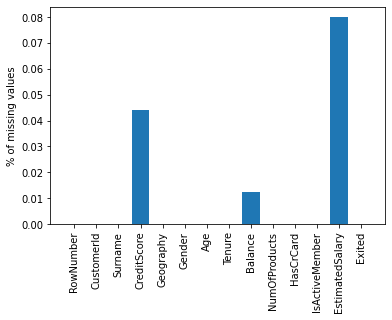

In [19]:
plt.bar(df_na.index, df_na.values)
plt.xticks(rotation=90)
plt.ylabel('% of missing values');

In [20]:
todrop = ['CreditScore', 'Balance', 'EstimatedSalary']
df_new = df.drop(df[todrop], axis=1)
df_new = df_new.drop(df_new[['Surname','CustomerId','RowNumber']], axis=1)

In [21]:
df_new

,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,42,2,1,1,1,1
1,Spain,Female,41,1,1,0,1,0
2,France,Female,42,8,3,1,0,1
3,France,Female,39,1,2,0,0,0
4,Spain,Female,43,2,1,1,1,0
...,...,...,...,...,...,...,...,...
9995,France,Male,39,5,2,1,0,0
9996,France,Male,35,10,1,1,1,0
9997,France,Female,36,7,1,0,1,1
9998,Germany,Male,42,3,2,1,0,1


drop 'Surname', 'CustomerId','RowNumber' because they doesn't affect our target. 

**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

**Clarification with Example below : Here `flWinner` is the Target Variable and `descMapName` is a categorical feature. You are required to make such side-by-side bar plot for each categorical feature with repect to it's class distribution with the target feature for our dataset.**

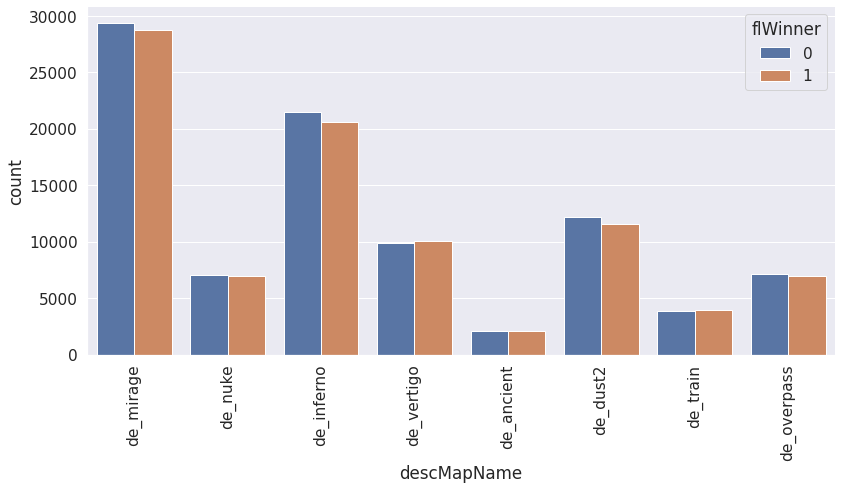

categorical features: Geography, Gender, HasCrCard, IsActiveMember

In [23]:
## YOUR CODE HERE

In [24]:
geog = df_new.groupby(['Geography','Exited']).count() # dataframe
geog

Gender   Age  Tenure  NumOfProducts  HasCrCard  \
Geography Exited                                                   
France    0         4204  4204    4204           4204       4204   
          1          810   810     810            810        810   
Germany   0         1695  1695    1695           1695       1695   
          1          814   814     814            814        814   
Spain     0         2064  2064    2064           2064       2064   
          1          413   413     413            413        413   

                  IsActiveMember  
Geography Exited                  
France    0                 4204  
          1                  810  
Germany   0                 1695  
          1                  814  
Spain     0                 2064  
          1                  413

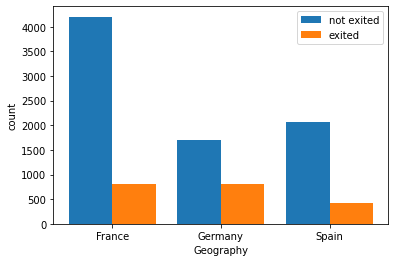

In [25]:
geog_cat = ['France', 'Germany', 'Spain']
not_exited=[4204,1695,2064]
exited=[810,814,413]


x_axis = np.arange(len(geog_cat))
plt.bar(x_axis -0.2, not_exited, width=0.4, label = 'not exited')
plt.bar(x_axis +0.2, exited, width=0.4, label = 'exited')

plt.xticks(x_axis, geog_cat)
plt.xlabel('Geography')
plt.ylabel('count')
plt.legend()
plt.show()

In [26]:
gend = df_new.groupby(['Gender','Exited']).count() # dataframe
gend

Geography   Age  Tenure  NumOfProducts  HasCrCard  \
Gender Exited                                                      
Female 0            3404  3404    3404           3404       3404   
       1            1139  1139    1139           1139       1139   
Male   0            4559  4559    4559           4559       4559   
       1             898   898     898            898        898   

               IsActiveMember  
Gender Exited                  
Female 0                 3404  
       1                 1139  
Male   0                 4559  
       1                  898

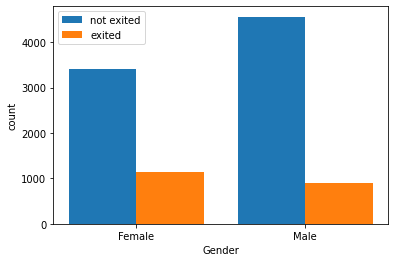

In [27]:
gend_cat = ['Female', 'Male']
not_exited=[3404,4559]
exited=[1139,898]


x_axis = np.arange(len(gend_cat))
plt.bar(x_axis -0.2, not_exited, width=0.4, label = 'not exited')
plt.bar(x_axis +0.2, exited, width=0.4, label = 'exited')

plt.xticks(x_axis, gend_cat)
plt.xlabel('Gender')
plt.ylabel('count')
plt.legend()
plt.show()

In [28]:
hasc = df_new.groupby(['HasCrCard','Exited']).count() # dataframe
hasc

Geography  Gender   Age  Tenure  NumOfProducts  \
HasCrCard Exited                                                   
0         0            2332    2332  2332    2332           2332   
          1             613     613   613     613            613   
1         0            5631    5631  5631    5631           5631   
          1            1424    1424  1424    1424           1424   

                  IsActiveMember  
HasCrCard Exited                  
0         0                 2332  
          1                  613  
1         0                 5631  
          1                 1424

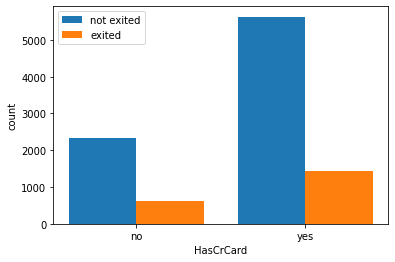

In [29]:
hasc_cat = ['no', 'yes']
not_exited=[2332,5631]
exited=[613,1424]


x_axis = np.arange(len(hasc_cat))
plt.bar(x_axis -0.2, not_exited, width=0.4, label = 'not exited')
plt.bar(x_axis +0.2, exited, width=0.4, label = 'exited')

plt.xticks(x_axis, hasc_cat)
plt.xlabel('HasCrCard')
plt.ylabel('count')
plt.legend()
plt.show()

In [30]:
isactive = df_new.groupby(['IsActiveMember','Exited']).count() # dataframe
isactive

Geography  Gender   Age  Tenure  NumOfProducts  \
IsActiveMember Exited                                                   
0              0            3547    3547  3547    3547           3547   
               1            1302    1302  1302    1302           1302   
1              0            4416    4416  4416    4416           4416   
               1             735     735   735     735            735   

                       HasCrCard  
IsActiveMember Exited             
0              0            3547  
               1            1302  
1              0            4416  
               1             735

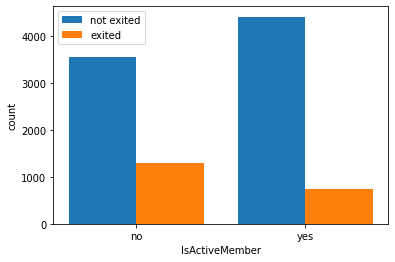

In [31]:
isactive_cat = ['no', 'yes']
not_exited=[3547,4416]
exited=[1302,735]


x_axis = np.arange(len(isactive_cat))
plt.bar(x_axis -0.2, not_exited, width=0.4, label = 'not exited')
plt.bar(x_axis +0.2, exited, width=0.4, label = 'exited')

plt.xticks(x_axis, isactive_cat)
plt.xlabel('IsActiveMember')
plt.ylabel('count')
plt.legend()
plt.show()

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [32]:
labels_dist = df_new.groupby(['Exited']).count() # dataframe
labels_dist

,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember
Exited,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037


We first split data into features and label. Then, we use stratified splitting to ensure that the ratio of indicies in the development and test datasets equals that of the original dataset. Because the original dataset is imbalanced with 7963 0's and 2037 1's. 

In [33]:
## YOUR CODE HERE
# Split data into features and labels
df_X = df_new.drop(columns=['Exited'])
df_y = df_new['Exited']

df_X_dev, df_X_test, df_y_dev, df_y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0, stratify=df_y)
df_y_dev

493     1
6839    0
170     0
4958    0
4271    0
       ..
6727    1
4674    0
6399    1
872     0
8389    0
Name: Exited, Length: 8000, dtype: int64

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

No need to scale because decision tree is invariant to scale of data. The range of one variable does not affect the training process of the other variables. 

In [34]:
## YOUR CODE HERE
df_X_dev= pd.get_dummies(df_X_dev)
df_X_test= pd.get_dummies(df_X_test)
#df_X_dev

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [35]:
## YOUR CODE HERE
clf = DecisionTreeClassifier(random_state=0)
clf.fit(df_X_dev, df_y_dev)
df_y_dev_pred = clf.predict(df_X_dev)
print('performance of the tree on the development set:')
print(classification_report(df_y_dev, df_y_dev_pred))
clf.score(df_X_dev,df_y_dev)

performance of the tree on the development set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6370
           1       0.99      0.81      0.89      1630

    accuracy                           0.96      8000
   macro avg       0.97      0.90      0.93      8000
weighted avg       0.96      0.96      0.96      8000



0.95825

In [59]:
df_y_test_pred = clf.predict(df_X_test)
print('performance of the tree on the test set:')
print(classification_report(df_y_test, df_y_test_pred))
clf.score(df_X_test,df_y_test)

performance of the tree on the test set:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1593
           1       0.51      0.43      0.47       407

    accuracy                           0.80      2000
   macro avg       0.69      0.66      0.67      2000
weighted avg       0.79      0.80      0.79      2000



0.801

The performance of the tree on the development set is nearly perfect, nearly all the predictions are true for both classes. But the performance of the tree on the test set is not good. The accuracy is low. Especially for the minority class (label=1), the precision and recall are low. The huge difference between performance on development and test data is because the model with pure leaves are overfitting.

**1.7: Visualize the trained tree until the max_depth 8**

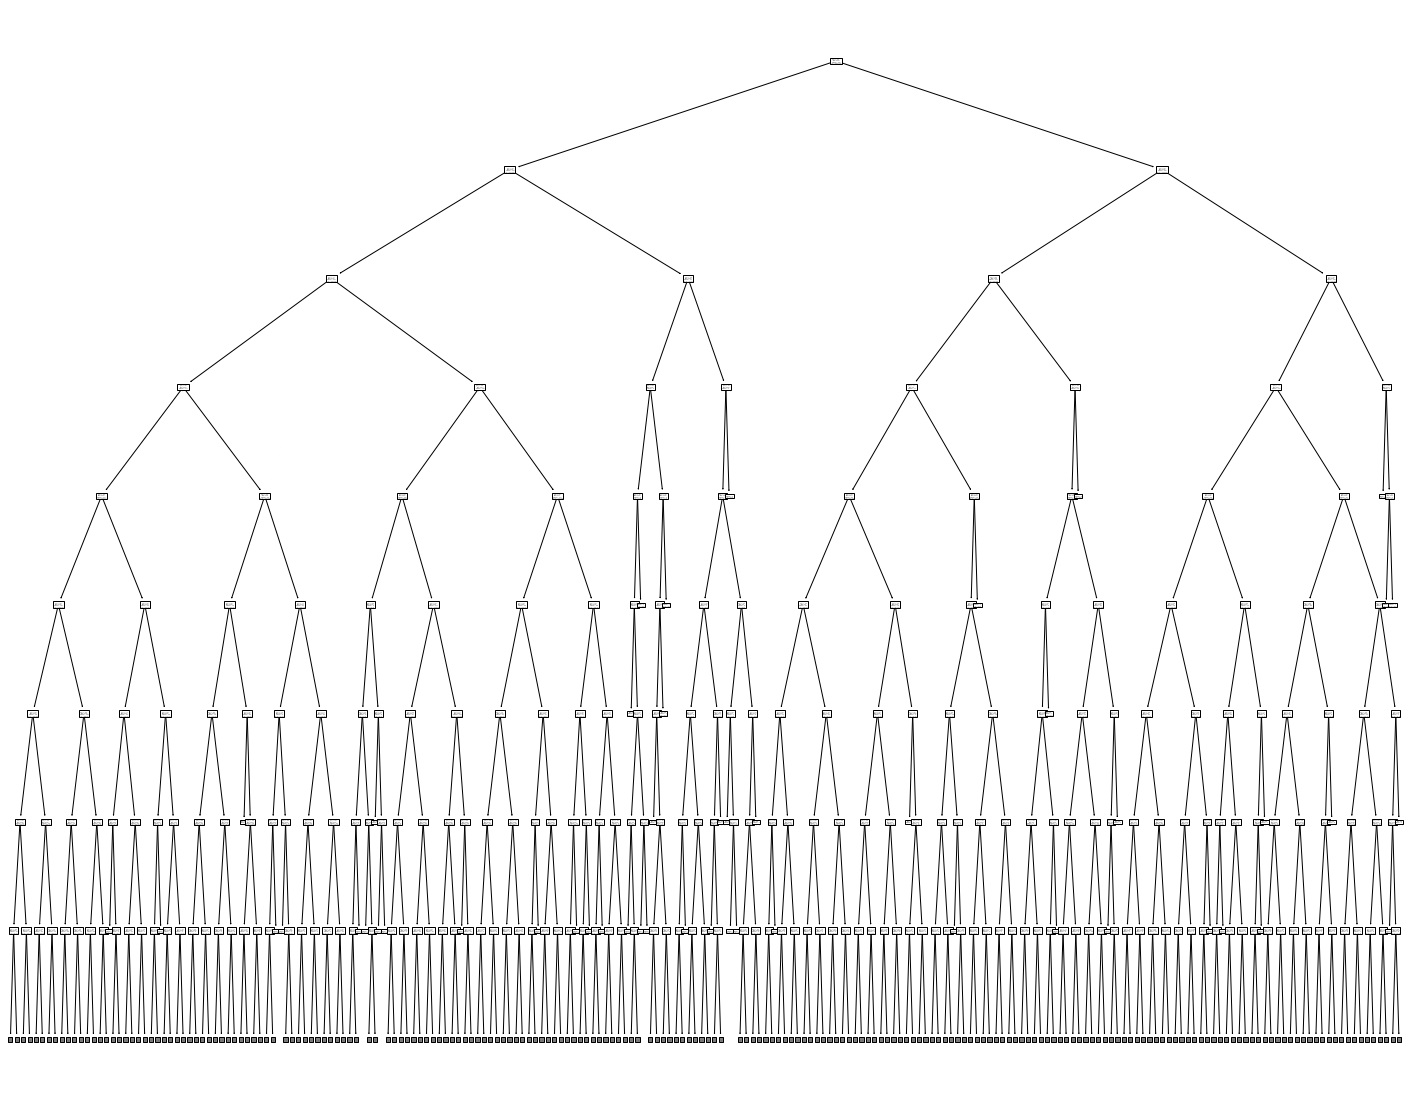

In [60]:
## YOUR CODE HERE
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, max_depth=8)

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [61]:
## YOUR CODE HERE
clf_gridserach = GridSearchCV(clf, param_grid=[{'max_depth': np.arange(2,10)}], return_train_score=True)
clf_gridserach.fit(df_X_dev, df_y_dev)
clf_gridserach.best_params_

{'max_depth': 6}

In [62]:
best_tree=DecisionTreeClassifier(max_depth=6, random_state=0)
best_tree.fit(df_X_dev, df_y_dev)
df_y_test_tuned_pred = best_tree.predict(df_X_test)
print('performance of the tree on the development set:')
print(classification_report(df_y_test, df_y_test_tuned_pred))
best_tree.score(df_X_test,df_y_test)

performance of the tree on the development set:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.73      0.41      0.52       407

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



0.8495

The pruned tree has better performance. The accuracy increases. The precision for the minority class (lable=1) improves a lot. The pruned tree mitigated the overfitting problem. 

**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [63]:
## YOUR CODE HERE
feature_names=list(df_X_dev.columns)

In [64]:
feature_impor=zip(feature_names, best_tree.feature_importances_)
a=pd.DataFrame(feature_impor)
a
a.sort_values(1, ascending=False).head(3)

,0,1
0,Age,0.469384
2,NumOfProducts,0.322209
4,IsActiveMember,0.128539


the top 3 most important features for this tuned trained tree are age, NumOfProducts, and IsActiveMember.

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node in the tree.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [80]:
## YOUR CODE HERE
rf=RandomForestClassifier(random_state=0)
rf.fit(df_X_dev, df_y_dev)
df_y_test_pred = rf.predict(df_X_test)
print('performance of random forest on the test set:')
print(classification_report(df_y_test, df_y_test_pred))
rf.score(df_X_test,df_y_test)

performance of random forest on the test set:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1593
           1       0.58      0.45      0.51       407

    accuracy                           0.82      2000
   macro avg       0.72      0.68      0.70      2000
weighted avg       0.81      0.82      0.81      2000



0.822

The model performs slightly better than decision tree model in Q1.6. The overall accuracy is higher. The prediction for both classes improves slightly. But the model still does not predict the minority class (label=1) well.

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

All trees in the trained random forest model have pure leaves. Becuase we leave the max_depth attribute in RandomForestClassifier as default. According to the document, nodes are expanded until all leaves are pure. Besides, we checked the impurities for all the leaves in all the trees in random forest to be 0.

In [89]:
## YOUR CODE HERE ####
#check purity of the last nodes use bfs. input: model. inside: .tree

In [103]:
n_nodes=[]
children_left=[]
children_right=[]

In [104]:
for i in range(len(rf.estimators_)):
  n_nodes = rf[i].tree_.node_count
  children_left = rf[i].tree_.children_left
  children_right = rf[i].tree_.children_right
  feature = rf[i].tree_.feature
  threshold = rf[i].tree_.threshold

  node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
  is_leaves = np.zeros(shape=n_nodes, dtype=bool)
  impurity_leaves=0
  stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
  while len(stack) > 0:
      # `pop` ensures each node is only visited once
      node_id, depth = stack.pop()
      node_depth[node_id] = depth

      # If the left and right child of a node is not the same we have a split
      # node
      is_split_node = children_left[node_id] != children_right[node_id]
      # If a split node, append left and right children and depth to `stack`
      # so we can loop through them
      if is_split_node:
          stack.append((children_left[node_id], depth + 1))
          stack.append((children_right[node_id], depth + 1))
      else:
          is_leaves[node_id] = True
  
  print(rf[i].tree_.impurity[-1]) # impurity of the last level




0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [ ]:
## YOUR ANSWER HERE

To improve the performance of the model, we tuned number of trees and max depths of each tree. Random forest bootstrapped samples and random subset of features to train each tree. Generalization improves with uncorrelated trees. So, we tuned the number of trees so that trees are not so correlated and we have a suitable number of tree to generalize to improve model preformance. We tuned max depths of each tree to balance between overfitting and model complexity. So that we are not overfitting and the model is complex enough to capture the pattern of the data for prediction.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [ ]:
## YOUR ANSWER HERE

In [69]:
number_of_trees=[100,150,200,250,300]
max_depths=[5,6,7,8,9]

The optimal max_depth for the tree model is 6, so we choose tune the max_depth around 6.

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [ ]:
## YOUR CODE HERE

In [70]:
rf_gridserach = GridSearchCV(rf, param_grid=[{'max_depth': max_depths, 'n_estimators': number_of_trees}], cv=5, return_train_score=True)
rf_gridserach.fit(df_X_dev, df_y_dev)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': [5, 6, 7, 8, 9],
                          'n_estimators': [100, 150, 200, 250, 300]}],
             return_train_score=True)

In [71]:
print('best hyperparameters:', rf_gridserach.best_params_)

best hyperparameters: {'max_depth': 8, 'n_estimators': 200}


In [72]:
rf_tuned=RandomForestClassifier(n_estimators=200, max_depth=8, random_state=0)
rf_tuned.fit(df_X_dev, df_y_dev)
df_y_test_tuned_pred = rf_tuned.predict(df_X_test)
print('performance of tuned random forest on the test set:')
print(classification_report(df_y_test, df_y_test_tuned_pred))
rf_tuned.score(df_X_test,df_y_test)

performance of tuned random forest on the test set:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.77      0.40      0.52       407

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.84      0.85      0.83      2000



0.8535

The model performs better than plain-vanilla random forest model trained in Q2.1. The overall accuracy has increased to 0.8535. The precision for minority class (label=1) improves.

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

In [73]:
## YOUR CODE HERE
feature_impor=zip(feature_names, rf_tuned.feature_importances_)
a=pd.DataFrame(feature_impor)
a
a.sort_values(1, ascending=False).head(3)

,0,1
0,Age,0.443032
2,NumOfProducts,0.299702
4,IsActiveMember,0.086741


the top 3 most important features for this tuned trained tree are age, NumOfProducts, and IsActiveMember. They are the same to the important features found from Q1.9. The important features found from q2.6 make more sense. Random forest repeats the process of decision trees and average the output from each of the models to make final prediction. So, the result of random forest is more stable and accurate.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [36]:
## YOUR CODE HERE
import time

In [37]:
max_depths=[3,4,5,6]
learn_rate=[0.05,0.1,0.15,0.2]
n_estimators=[100,200,300,400] # The number of boosting stages to perform

In [56]:
st = time.time()

GB=GradientBoostingClassifier(random_state=0)
GB_grid = GridSearchCV(GB, param_grid=[{'learning_rate':learn_rate, 'max_depth': max_depths, 'n_estimators': n_estimators}], cv=5, return_train_score=True)
GB_grid.fit(df_X_dev, df_y_dev)

et = time.time()

KeyboardInterrupt: ignored

In [77]:
print('time to tune GradientBoostingClassifier:', et-st, 'seconds')
print('GradientBoostingClassifier best hyperparameters:', GB_grid.best_params_)

time to tune GradientBoostingClassifier: 566.3709967136383 seconds
GradientBoostingClassifier best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [78]:
GB_tuned=GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)
GB_tuned.fit(df_X_dev, df_y_dev)
GB_tuned_y_test_pred = GB_tuned.predict(df_X_test)
print('performance of tuned GradientBoostingClassifier on the test set:')
print(classification_report(df_y_test, GB_tuned_y_test_pred))
GB_tuned.score(df_X_test,df_y_test)

performance of tuned GradientBoostingClassifier on the test set:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.42      0.54       407

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



0.854

In [79]:
st = time.time()

HGB=HistGradientBoostingClassifier(random_state=0)
HGB_grid = GridSearchCV(HGB, param_grid=[{'learning_rate':learn_rate, 'max_depth': max_depths, 'max_iter': n_estimators}], cv=5, return_train_score=True)
HGB_grid.fit(df_X_dev, df_y_dev)

et = time.time()

In [80]:
print('time to tune HistGradientBoostingClassifier:', et-st, 'seconds')
print('HistGradientBoostingClassifier best hyperparameters:', HGB_grid.best_params_)

time to tune HistGradientBoostingClassifier: 208.9365336894989 seconds
HistGradientBoostingClassifier best hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'max_iter': 200}


In [81]:
HGB_tuned=HistGradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_iter=200, random_state=0)
HGB_tuned.fit(df_X_dev, df_y_dev)
HGB_tuned_y_test_pred = HGB_tuned.predict(df_X_test)
print('performance of tuned HistGradientBoostingClassifier on the test set:')
print(classification_report(df_y_test, HGB_tuned_y_test_pred))
HGB_tuned.score(df_X_test,df_y_test)

performance of tuned HistGradientBoostingClassifier on the test set:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.42      0.54       407

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



0.8525

**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [39]:
# pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 50 kB/s 


In [40]:
from xgboost import XGBClassifier

In [41]:
XGBC=XGBClassifier(random_state=0)
XGBC_tuned = GridSearchCV(XGBC, param_grid=[{'learning_rate':learn_rate, 'max_depth': max_depths, 'n_estimators': n_estimators}], cv=10, verbose=5, scoring='accuracy')
XGBC_tuned.fit(df_X_dev, df_y_dev)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV 1/10] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.861 total time=   4.0s
[CV 2/10] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.863 total time=   1.1s
[CV 3/10] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.866 total time=   2.2s
[CV 4/10] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.864 total time=   0.6s
[CV 5/10] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.861 total time=   1.8s
[CV 6/10] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.866 total time=   0.9s
[CV 7/10] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.855 total time=   0.2s
[CV 8/10] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.861 total time=   0.2s
[CV 9/10] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.844 total time=   1.3s
[CV 10/10] END learning_rate=0.05, max_depth=3, n_estimators=100

KeyboardInterrupt: ignored

In [122]:
print('XGBClassifier best hyperparameters:', XGBC_grid.best_params_)

XGBClassifier best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [42]:
#XGBC_tuned=XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100, random_state=0)
#XGBC_tuned.fit(df_X_dev, df_y_dev)
XGBC_tuned_y_test_pred = XGBC_tuned.predict(df_X_test)
print('performance of tuned XGBClassifier on the test set:')
print(classification_report(df_y_test, XGBC_tuned_y_test_pred))
XGBC_tuned.score(df_X_test,df_y_test)

performance of tuned XGBClassifier on the test set:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.42      0.54       407

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



0.852

The performance of XGBoost model is similar with the perfomance of HistGradientBoostingClassifier and GradientBoostingClassifier in 3.1.

**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

In [ ]:
## YOUR ANSWER HERE

Decision tree has the worst performance. It has accuracy 0.801. It does not predict well for minority class (label=1) with precision of minority class = 0.51, f1-score of minority class = 0.47. Random forest performs better. It has accuracy 0.822. It also predict better for minority class with precision of minority class = 0.58, f1-score of minority class = 0.51.
XGBoost, HistGradientBoostingClassifier, and GradientBoostingClassifier have similar performances. They have accuracies around 0.825, with the highest accuracy(accuracy of GradientBoostingClassifier) being 0.854. They also have higher precision for minority class. But GradientBoostingClassifier runs slowly. 
The difference of accuracy between the best and the worst model is 0.854-0.801=0.053. The difference of precision for minorty between the best and the worst model is 0.76-0.51=0.25. Though the difference of accuracy is small, the difference of precision for minorty class is large.

Considering model performance and running time, I will use 
XGBoost or HistGradientBoostingClassifier.

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

In [89]:
## YOUR CODE HERE
feature_impor=zip(feature_names, XGBC_tuned.feature_importances_)
a=pd.DataFrame(feature_impor)
a
a.sort_values(1, ascending=False).head(3)

,0,1
2,NumOfProducts,0.274358
4,IsActiveMember,0.246694
0,Age,0.166711


the top 3 features from the trained XGBoost model are: NumOfProducts, IsActiveMember, and Age. Compared with Random Forest and Decision Tree: age, NumOfProducts, and IsActiveMember. The features are the same, only the orders are different. I trust the XGBoost model the most. Because XGBoost trains regression trees in sequential manner on modified datasets, and each tree can learn from the previous one. Weights for each tree classifer are used to combine the outputs. XGBoost has the stability that random forest has, but plus the evolving learning process to improve the proformance of each trees classifer.

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [90]:
## YOUR CODE HERE
a.sort_values(1, ascending=False).head(7)
a.sort_values(1, ascending=False)

,0,1
2,NumOfProducts,0.274358
4,IsActiveMember,0.246694
0,Age,0.166711
6,Geography_Germany,0.137902
8,Gender_Female,0.069178
5,Geography_France,0.032874
7,Geography_Spain,0.027511
1,Tenure,0.023617
3,HasCrCard,0.021155
9,Gender_Male,0.000000


the top 7 features (as given by feature importances from XGBoost): NumOfProducts, IsActiveMember, Age, Geography_Germany, Gender_Female, Geography_France, Geography_Spain.

In [91]:
df_X_dev_dropped=df_X_dev.drop(columns=['Gender_Male','HasCrCard','Tenure'])
df_X_test_dropped=df_X_test.drop(columns=['Gender_Male','HasCrCard','Tenure'])

In [ ]:
#df_X_test_dropped # 7 col

In [94]:
XGBC_grid.fit(df_X_dev_dropped, df_y_dev)

GridSearchCV(cv=10, estimator=XGBClassifier(),
             param_grid=[{'learning_rate': [0.05, 0.1, 0.15, 0.2],
                          'max_depth': [3, 4, 5, 6],
                          'n_estimators': [100, 200, 300, 400]}],
             return_train_score=True)

In [95]:
print('XGBClassifier with top 7 features: best hyperparameters:', XGBC_grid.best_params_)

XGBClassifier with top 7 features: best hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}


In [96]:
XGBC_tuned7=XGBClassifier(learning_rate=0.05, max_depth=4, n_estimators=100, random_state=0)
XGBC_tuned7.fit(df_X_dev_dropped, df_y_dev)
XGBC_tuned7_y_test_pred = XGBC_tuned7.predict(df_X_test_dropped)
print('performance of tuned XGBClassifier with top 7 features on the test set:')
print(classification_report(df_y_test, XGBC_tuned7_y_test_pred))
XGBC_tuned7.score(df_X_test_dropped,df_y_test)

performance of tuned XGBClassifier with top 7 features on the test set:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.74      0.41      0.53       407

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



0.8505

The performance is not better. Because it depends on hyperparameters and structure of the dataset. In this case, the performances are similar maybe because the total number of features is not large.

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [43]:
from sklearn.metrics import brier_score_loss

In [44]:
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

In [45]:
print(brier_score_loss(df_y_test, XGBC_tuned.predict_proba(df_X_test)[:,1]))

0.10891077276851999


**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

In [46]:
X_train, X_calib, y_train, y_calib = train_test_split(df_X_dev, df_y_dev, test_size=0.25, random_state=0)

In [47]:
cal_XGBC_iso=CalibratedClassifierCV(XGBC_tuned, cv='prefit', method='isotonic')


In [48]:
cal_XGBC_iso.fit(X_calib, y_calib)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

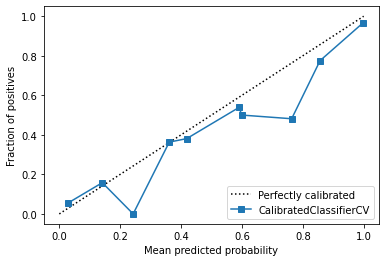

In [49]:
display = CalibrationDisplay.from_estimator(cal_XGBC_iso, df_X_test, df_y_test, n_bins = 10)

In [68]:
## YOUR CODE HERE
#You can plot a calibration graph similar to (Lecture 5 - Slide 60)

In [50]:
cal_XGBC_platt=CalibratedClassifierCV(XGBC_tuned, cv='prefit', method='sigmoid')

In [51]:
cal_XGBC_platt.fit(X_calib, y_calib)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=0,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                              

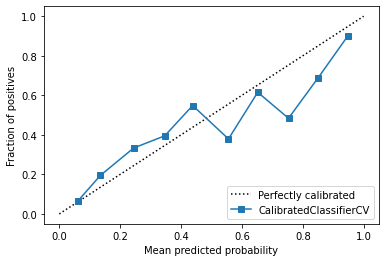

In [52]:
display = CalibrationDisplay.from_estimator(cal_XGBC_platt, df_X_test, df_y_test, n_bins = 10)

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [54]:
## YOUR CODE HERE
print('brier scores for isotonic regression', brier_score_loss(df_y_test, cal_XGBC_iso.predict_proba(df_X_test)[:,1]))

brier scores for isotonic regression 0.11109663614053028


In [55]:
print('brier scores for Platt scaling', brier_score_loss(df_y_test, cal_XGBC_platt.predict_proba(df_X_test)[:,1]))

brier scores for Platt scaling 0.11219462174776478


Based from the brier scores, calibration methods don't help in having better predicted probabilities. But calibration methods may be helpful for other cases.